In [550]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import confusion_matrix
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder




In [551]:
df = pd.read_csv("./bank-additional-full.csv", delimiter = ";")

In [552]:
desired_output = df["y"]

In [553]:
df_dummies = pd.get_dummies(df)

In [554]:
del df_dummies["duration"]

In [555]:
del df_dummies["y_no"]

In [556]:
df_dummies.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0


In [557]:
df_dummies = df_dummies.dropna()

In [558]:
df_dummies.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0


In [559]:
y_df_dummies = df_dummies["y_yes"].copy()

In [560]:
y_df_dummies["id"]=range(1,len(df_dummies)+1)

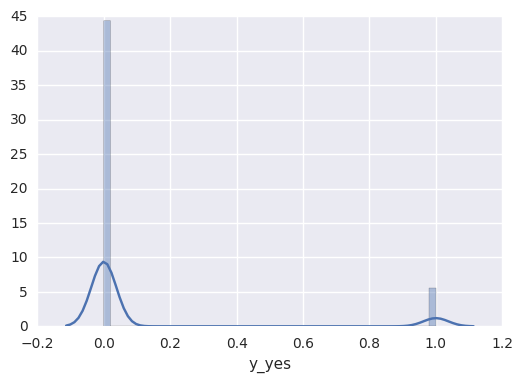

In [561]:
sns_plot = sns.distplot(df_dummies["y_yes"])

In [562]:
outcomes_of_interest = ["y_yes"]

In [563]:
n_bins = 20

In [564]:
X_df_dummies = df_dummies.copy()

In [565]:
del X_df_dummies["y_yes"]

In [566]:
Y_df_dummies = df_dummies[outcomes_of_interest].copy()

In [567]:
Y_df_dummies[outcomes_of_interest] = Y_df_dummies[outcomes_of_interest].apply(LabelEncoder().fit_transform)

In [568]:
X = X_df_dummies.values

In [569]:
Y = Y_df_dummies.values.T[0]

In [577]:
clf = ExtraTreesClassifier(n_estimators = 10,max_depth = 1)

dummy_clf = DummyClassifier()

In [578]:
scores = cross_val_score(clf, X, Y, cv=10,scoring = make_scorer(acc))

In [579]:
dummy_scores = cross_val_score(dummy_clf, X, Y, cv=10, scoring = make_scorer(acc))

In [580]:
print("ACC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f (+/- %0.2f)" % (dummy_scores.mean(), dummy_scores.std()))

ACC: 0.89 (+/- 0.00)
Dummy ACC: 0.80 (+/- 0.01)


In [584]:
clf_2 = RandomForestClassifier(n_estimators = 50,max_depth = 1)

In [585]:
scores = cross_val_score(clf, X, Y, cv=10,scoring = make_scorer(acc))

In [586]:
print("ACC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f (+/- %0.2f)" % (dummy_scores.mean(), dummy_scores.std()))

ACC: 0.89 (+/- 0.00)
Dummy ACC: 0.80 (+/- 0.01)


[ 2 61  1  4 53 42  8 10 22 18 19 20 21 24 23 25 26 27 17 14 16 15 29 13 12
 11  9  7  6  5  3 28 30 60 46 59 58 57 56 55 54 52 51 50 49 48 47 45 31 44
 43 41 40 39 38 37 36 35 34 33 32  0]
Feature ranking:
1. pdays (0.300000)
2. poutcome_success (0.100000)
3. campaign (0.100000)
4. emp.var.rate (0.100000)
5. month_sep (0.100000)
6. contact_cellular (0.100000)
7. nr.employed (0.100000)
8. job_blue-collar (0.100000)
9. marital_married (0.000000)
10. job_technician (0.000000)
11. job_unemployed (0.000000)
12. job_unknown (0.000000)
13. marital_divorced (0.000000)
14. marital_unknown (0.000000)
15. marital_single (0.000000)
16. education_basic.4y (0.000000)
17. education_basic.6y (0.000000)
18. education_basic.9y (0.000000)
19. job_student (0.000000)
20. job_retired (0.000000)
21. job_services (0.000000)
22. job_self-employed (0.000000)
23. education_illiterate (0.000000)
24. job_management (0.000000)
25. job_housemaid (0.000000)
26. job_entrepreneur (0.000000)
27. job_admin. (0.000000)
2

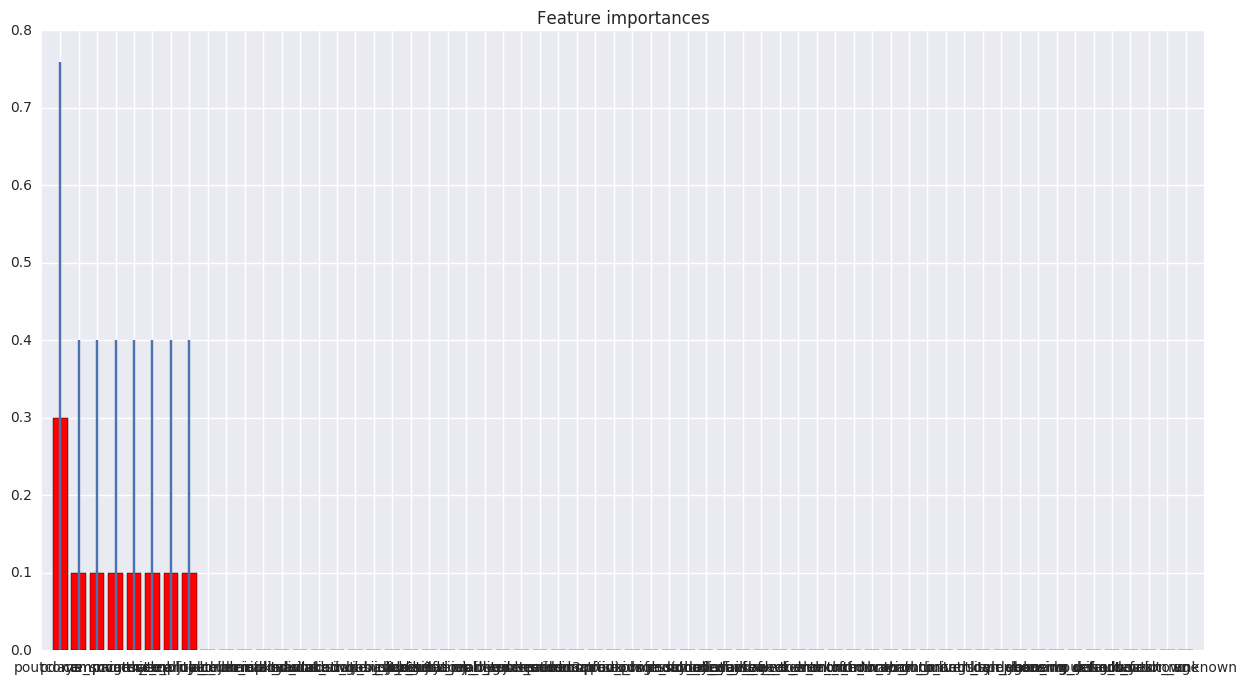

In [593]:
clf.fit(X,Y)
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print indices
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, df_dummies.columns[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(df_dummies.columns)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

plt.savefig("importances.png",bbox_inches='tight')
plt.savefig("importances.pdf",bbox_inches='tight')

Normalized confusion matrix


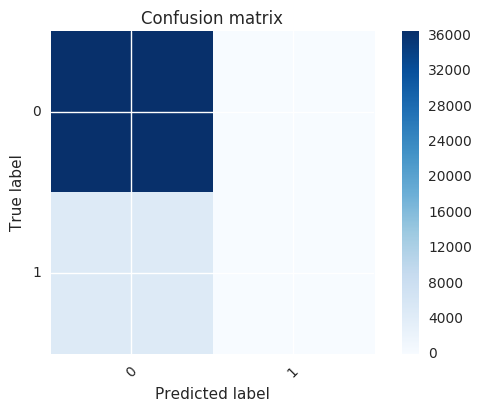

In [597]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
        #print t
#         plt.text(j, i, t,
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
y_pred = clf.predict(X)
cnf_matrix = confusion_matrix(Y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(Y))), normalize = True,
                      title='Confusion matrix')

plt.savefig("confusion.png",bbox_inches='tight')
plt.savefig("confusion.pdf",bbox_inches='tight')


[ 4  7  8  2  5  6 42 61 50 60 49  0 53 10 46 43 17 11 20 19 18 16 15 14 13
 12 51 22  9 54 55 56 57 58  3 59  1 21 24 23 36 47 45 44 52 41 40 39 38 37
 35 48 34 33 32 31 29 28 27 26 25 30]
Feature ranking:
1. emp.var.rate (0.160000)
2. euribor3m (0.120000)
3. nr.employed (0.120000)
4. pdays (0.100000)
5. cons.price.idx (0.060000)
6. cons.conf.idx (0.060000)
7. contact_cellular (0.060000)
8. poutcome_success (0.040000)
9. month_may (0.040000)
10. poutcome_nonexistent (0.040000)
11. month_mar (0.040000)
12. age (0.040000)
13. month_sep (0.040000)
14. job_blue-collar (0.020000)
15. month_dec (0.020000)
16. contact_telephone (0.020000)
17. job_student (0.020000)
18. job_entrepreneur (0.000000)
19. job_unknown (0.000000)
20. job_unemployed (0.000000)
21. job_technician (0.000000)
22. job_services (0.000000)
23. job_self-employed (0.000000)
24. job_retired (0.000000)
25. job_management (0.000000)
26. job_housemaid (0.000000)
27. month_nov (0.000000)
28. marital_married (0.000000)
29. job_ad

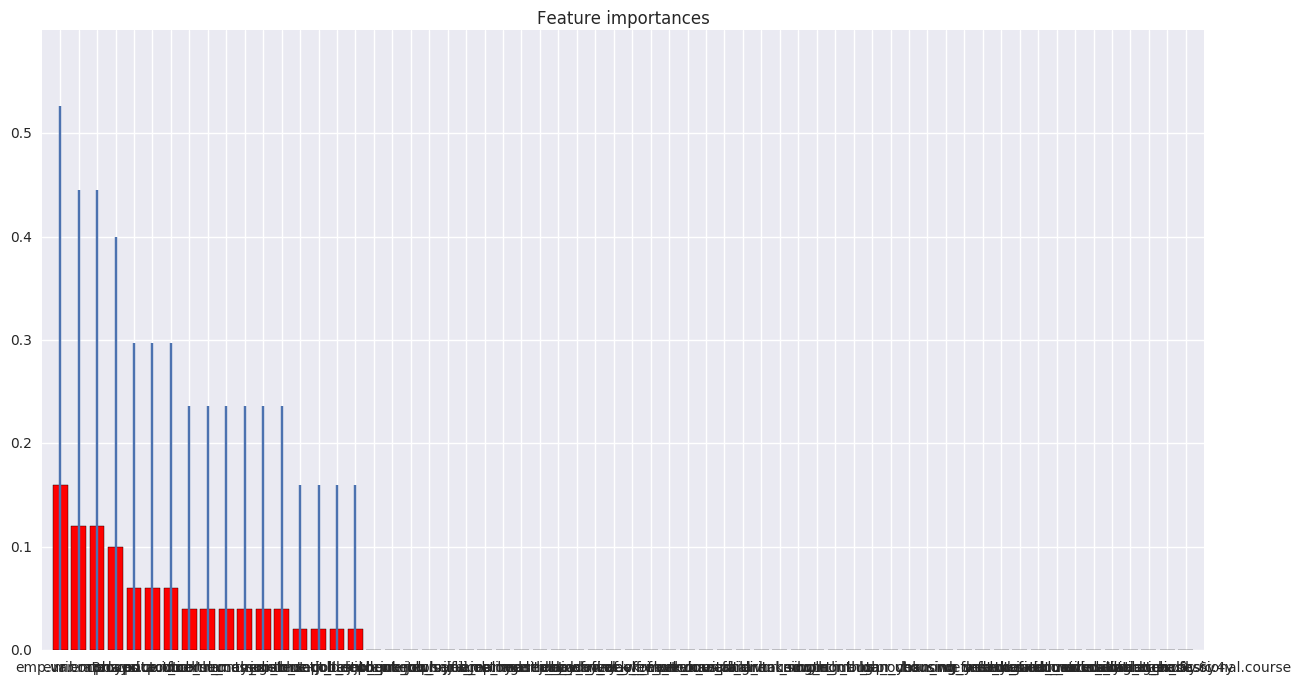

In [598]:
clf_2.fit(X,Y)
#Random Forest Feature Importance
importances = clf_2.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_2.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print indices
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, df_dummies.columns[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(df_dummies.columns)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

plt.savefig("importances.png",bbox_inches='tight')
plt.savefig("importances.pdf",bbox_inches='tight')

Normalized confusion matrix


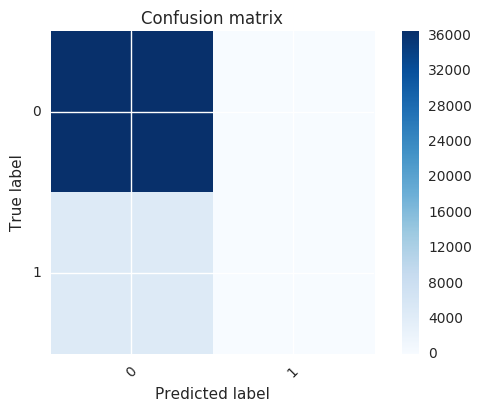

In [599]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix_randomforest(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
        #print t
#         plt.text(j, i, t,
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
y_pred = clf_2.predict(X)
cnf_matrix = confusion_matrix(Y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(Y))), normalize = True,
                      title='Confusion matrix')

plt.savefig("confusion.png",bbox_inches='tight')
plt.savefig("confusion.pdf",bbox_inches='tight')